## Project 3 ## 
**Step 02: Preprocessing Data**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 
pd.options.display.max_colwidth = 100

In [20]:
sub_awakened_clean = pd.read_csv('../data/sub_awakened_clean.csv',index_col=[0])
#sub_awakened_clean

In [21]:
# Changing index so all subsim are below 300
sub_awakened_clean.index = (range(0,283))

In [22]:
bot_awakened = pd.read_csv('../data/bot_awakened.csv', index_col = [0])

In [23]:
bot_awakened.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 285
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    285 non-null    object
 1   title        285 non-null    object
 2   selftext     285 non-null    object
 3   author       285 non-null    object
 4   created_utc  285 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.4+ KB


In [24]:
# Shifting the index so cascon starts at 5000
bot_awakened.index = (range(300,300+len(bot_awakened)))

In [25]:
both_awakes = bot_awakened.append(sub_awakened_clean)

In [26]:
both_awakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 300 to 282
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    568 non-null    object
 1   title        568 non-null    object
 2   selftext     568 non-null    object
 3   author       568 non-null    object
 4   created_utc  568 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 26.6+ KB


In [29]:
both_awakes['subreddit'] = both_awakes['subreddit'].map({
    'awakened': 0, 'SubSimulatorGPT2': 1})

In [30]:
both_awakes

,subreddit,title,selftext,author,created_utc
300,1,Can you use the same mindset of meditation to be more creative?,I've been trying to be more creative the last couple months. I used to write very slowly and was...,awakenedGPT2Bot,1642512660
301,1,Love is...,...the only thing that is all that exists.\n\nThis is why love is the highest form of consciousn...,awakenedGPT2Bot,1642392049
302,1,What is it about the journey that is so wonderful?,"I was reminded of the journey, and my own journey, through my life through this post.\n\nWhat is...",awakenedGPT2Bot,1642249857
303,1,"""You are you, your heart beat is your heart beat""",It really is a great phrase.,awakenedGPT2Bot,1642210249
304,1,No longer bound by the physical world,I love you all. I love all of you. I love every moment of every day of every day of every day of...,awakenedGPT2Bot,1642167055
...,...,...,...,...,...
278,0,“No” has a narrow use here.,"None of us *know*— therefore, we cannot, truthfully, say no. It may be “no” to us, but who are w...",ATPATPATP,1641821318
279,0,your moment of awakening,Can you guys describe your awakening? \nMine was after intense feeling of lonelines that kind ...,Reggiest,1641816449
280,0,I'm incredibly alone and when I have to be by myself after all other forms of trying to deal are...,I dont think I can heal. And I'm tired of not having what makes me whole.,boobsforbaboons,1641814138
281,0,101 Guide for recovering young adults…,\n\nPart One\n\n-\n\nThis is what makes you happy &amp; wealthy...\n\nGiving love…\n\nBeing lov...,LoveOracles,1641808455


In [31]:
both_awakes['doc'] = both_awakes['title'] + " " + both_awakes['selftext']

In [32]:
both_awakes.head(3)

,subreddit,title,selftext,author,created_utc,doc
300,1,Can you use the same mindset of meditation to be more creative?,I've been trying to be more creative the last couple months. I used to write very slowly and was...,awakenedGPT2Bot,1642512660,Can you use the same mindset of meditation to be more creative? I've been trying to be more crea...
301,1,Love is...,...the only thing that is all that exists.\n\nThis is why love is the highest form of consciousn...,awakenedGPT2Bot,1642392049,Love is... ...the only thing that is all that exists.\n\nThis is why love is the highest form of...
302,1,What is it about the journey that is so wonderful?,"I was reminded of the journey, and my own journey, through my life through this post.\n\nWhat is...",awakenedGPT2Bot,1642249857,"What is it about the journey that is so wonderful? I was reminded of the journey, and my own jou..."


In [33]:
# Creating a "Post Length" column for comparisons
both_awakes['post_length'] = both_awakes['doc'].map(len)

In [35]:
both_awakes

,subreddit,title,selftext,author,created_utc,doc,post_length
300,1,Can you use the same mindset of meditation to be more creative?,I've been trying to be more creative the last couple months. I used to write very slowly and was...,awakenedGPT2Bot,1642512660,Can you use the same mindset of meditation to be more creative? I've been trying to be more crea...,854
301,1,Love is...,...the only thing that is all that exists.\n\nThis is why love is the highest form of consciousn...,awakenedGPT2Bot,1642392049,Love is... ...the only thing that is all that exists.\n\nThis is why love is the highest form of...,144
302,1,What is it about the journey that is so wonderful?,"I was reminded of the journey, and my own journey, through my life through this post.\n\nWhat is...",awakenedGPT2Bot,1642249857,"What is it about the journey that is so wonderful? I was reminded of the journey, and my own jou...",754
303,1,"""You are you, your heart beat is your heart beat""",It really is a great phrase.,awakenedGPT2Bot,1642210249,"""You are you, your heart beat is your heart beat"" It really is a great phrase.",78
304,1,No longer bound by the physical world,I love you all. I love all of you. I love every moment of every day of every day of every day of...,awakenedGPT2Bot,1642167055,No longer bound by the physical world I love you all. I love all of you. I love every moment of ...,324
...,...,...,...,...,...,...,...
278,0,“No” has a narrow use here.,"None of us *know*— therefore, we cannot, truthfully, say no. It may be “no” to us, but who are w...",ATPATPATP,1641821318,"“No” has a narrow use here. None of us *know*— therefore, we cannot, truthfully, say no. It may ...",325
279,0,your moment of awakening,Can you guys describe your awakening? \nMine was after intense feeling of lonelines that kind ...,Reggiest,1641816449,your moment of awakening Can you guys describe your awakening? \nMine was after intense feelin...,301
280,0,I'm incredibly alone and when I have to be by myself after all other forms of trying to deal are...,I dont think I can heal. And I'm tired of not having what makes me whole.,boobsforbaboons,1641814138,I'm incredibly alone and when I have to be by myself after all other forms of trying to deal are...,194
281,0,101 Guide for recovering young adults…,\n\nPart One\n\n-\n\nThis is what makes you happy &amp; wealthy...\n\nGiving love…\n\nBeing lov...,LoveOracles,1641808455,101 Guide for recovering young adults… \n\nPart One\n\n-\n\nThis is what makes you happy &amp; w...,31018


In [36]:
both_awakes.to_csv('../data/both_awakes.csv')

## CountVectorizor w/ some changes to params: ##
**min_df=2, max_df=0.98**

**Got some code for adding stop words to the 'english' list**
https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list

In [ ]:
my_added_stop_words = ['don','ve','like','just']
stop_words=text.ENGLISH_STOP_WORDS.union(my_added_stop_words)

In [ ]:
# Instantiate a CountVectorizer with the 
#stop_words='english + my words', min_df=2, max_df=0.98 hyperparameters & default tokens
cvec_cascon = CountVectorizer(stop_words=stop_words, min_df=2, max_df=0.98)

In [ ]:
cascon_df = no_blanks[(no_blanks['subreddit']==0)]
cascon_doc = cascon_df['doc']

In [ ]:
# Fit the vectorizer on the corpus.
cvec_cascon.fit(cascon_doc)

In [238]:
# 8244 words in CasCon
len(cvec_cascon.get_feature_names())

8244

In [ ]:
# Transforming the data to a sparse array for analysis
cascon_trans = cvec_cascon.transform(cascon_doc)

In [ ]:
# convert training data to dataframe (densifying columns again to view)
cascon_trans_df = pd.DataFrame(cascon_trans.todense(), 
                               columns=cvec_cascon.get_feature_names())

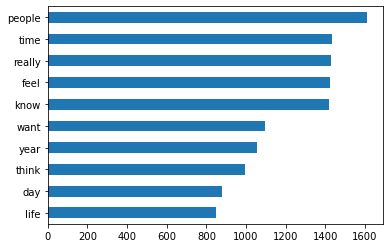

In [234]:
# plot top occuring words in Casual Conversations
cascon_trans_df.sum().sort_values().tail(10).plot(kind='barh');

In [ ]:
cvec_subsim = CountVectorizer(stop_words=stop_words, min_df=2, max_df=0.98)

In [ ]:
subsim_df = no_blanks[(no_blanks['subreddit']==1)]
subsim_doc = subsim_df['doc']

In [ ]:
cvec_subsim.fit(subsim_doc)

In [237]:
#8630 words
len(cvec_subsim.get_feature_names())

8630

In [ ]:
# Transforming the data to a sparse array for analysis
subsim_trans = cvec_subsim.transform(subsim_doc)

In [ ]:
# convert training data to dataframe (densifying columns again to view)
subsim_trans_df = pd.DataFrame(subsim_trans.todense(), 
                               columns=cvec_subsim.get_feature_names())

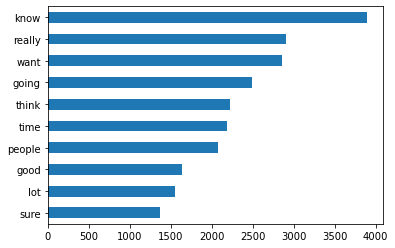

In [235]:
# plot top occuring words in Casual Conversations
subsim_trans_df.sum().sort_values().tail(10).plot(kind='barh');